In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sbrn

In [2]:
dtype_obj_fdata = {
    'health_service_area': str,
    'hospital_county': str,
    'operating_certificate_number': str,
    'facility_id': str,
    'facility_name': str,
    'age_group': str,
    'zip_code__3_digits': str,
    'gender': str,
    'race': str,
    'ethnicity': str,
    'length_of_stay': int,
    'type_of_admission': str,
    'patient_disposition': str,
    'discharge_year': int,
    'ccs_diagnosis_code': str,
    'ccs_diagnosis_description': str,
    'ccs_procedure_code': str,
    'ccs_procedure_description': str,
    'apr_drg_code': str,
    'apr_drg_description': str,
    'apr_mdc_code': str,
    'apr_mdc_description': str,
    'apr_severity_of_illness_code': str,
    'apr_severity_of_illness_description': str,
    'apr_risk_of_mortality': str,
    'apr_medical_surgical_description': str,
    'source_of_payment_1': str,
    'source_of_payment_2': str,
    'source_of_payment_3': str,
    'attending_provider_license_number': str,
    'operating_provider_license_number': str,
    'other_provider_license_number': str,
    'birth_weight': float,
    'abortion_edit_indicator': str,
    'emergency_department_indicator': str,
    'total_charges': float,
    'total_costs': float,
    'year': int,
    'hospital_service_area': str,
    'permanent_facility_id': str,
    'payment_typology_1': str,
    'payment_typology_2': str,
    'payment_typology_3': str,
    'diagnosis': str,
    'apr_risk_of_mortality_code': float
}

In [3]:
significantAttr = pd.read_csv("../data/enriched_data/CD_stat_tested.csv", index_col=0)
f_data = pd.read_csv("../data/enriched_data/CD_filtered.csv", index_col=0, dtype= dtype_obj_fdata)

In [4]:
significantAttr.iloc[[37]]

,X,Y,p,test,R^2
37,hospital_county,payment_typology_2,1.0,chi_squared,NaN


In [5]:
cols = list(f_data)
heat_df_RSq = pd.DataFrame(index = cols, columns = cols)
heat_df_P = pd.DataFrame(index = cols, columns = cols)
for col in cols:
    populate = False
    for col2 in cols:
        if populate:
            significant_attr_row = significantAttr[((significantAttr['X']==col) & (significantAttr['Y']==col2))|((significantAttr['Y']==col) & (significantAttr['X']==col2))]
            if significant_attr_row.size > 0:
                heat_df_RSq.at[col2,col] = significant_attr_row['R^2'].values[0]
                heat_df_P.at[col2,col] = significant_attr_row['p'].values[0]
            else:
                heat_df_RSq.at[col2,col] = -0.5
                heat_df_P.at[col2,col] = -0.5
        elif col2==col:
            populate = True
        if math.isnan(heat_df_RSq.at[col2, col]):
            heat_df_RSq.at[col2, col] = -1
        if math.isnan(heat_df_P.at[col2, col]):
            heat_df_P.at[col2, col] = -1

In [6]:
heat_df_RSq = heat_df_RSq.infer_objects()
heat_df_P = heat_df_P.infer_objects()

In [7]:
colorPalette =         ['#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ff0000',
                        '#ff0000','#ff0000','#ff0000','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff',
                        '#ffffff','#ffffff',
                        '#ffff00','#f2f20d','#e6e619','#d9d926','#cccc33','#bfbf40','#b2b24d','#a6a659','#999966',
                        '#8c8c73','#808080','#73738c','#666699','#5959a6','#4c4cb2','#4040bf','#3333cc','#2626d9',
                        '#1a1ae6','#0d0df2','#0000ff']
colorPaletteReversed = ['#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ff0000',
                        '#ff0000','#ff0000','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff',
                        '#ffffff','#ffffff',
                        '#0000ff','#0d0df2','#1a1ae6','#2626d9','#3333cc','#4040bf','#4c4cb2','#5959a6','#666699',
                        '#73738c','#808080','#8c8c73','#999966','#a6a659','#b2b24d','#bfbf40','#cccc33','#d9d926',
                        '#e6e619','#f2f20d','#ffff00']
sbrn.set(rc={'figure.figsize':(20,20)})

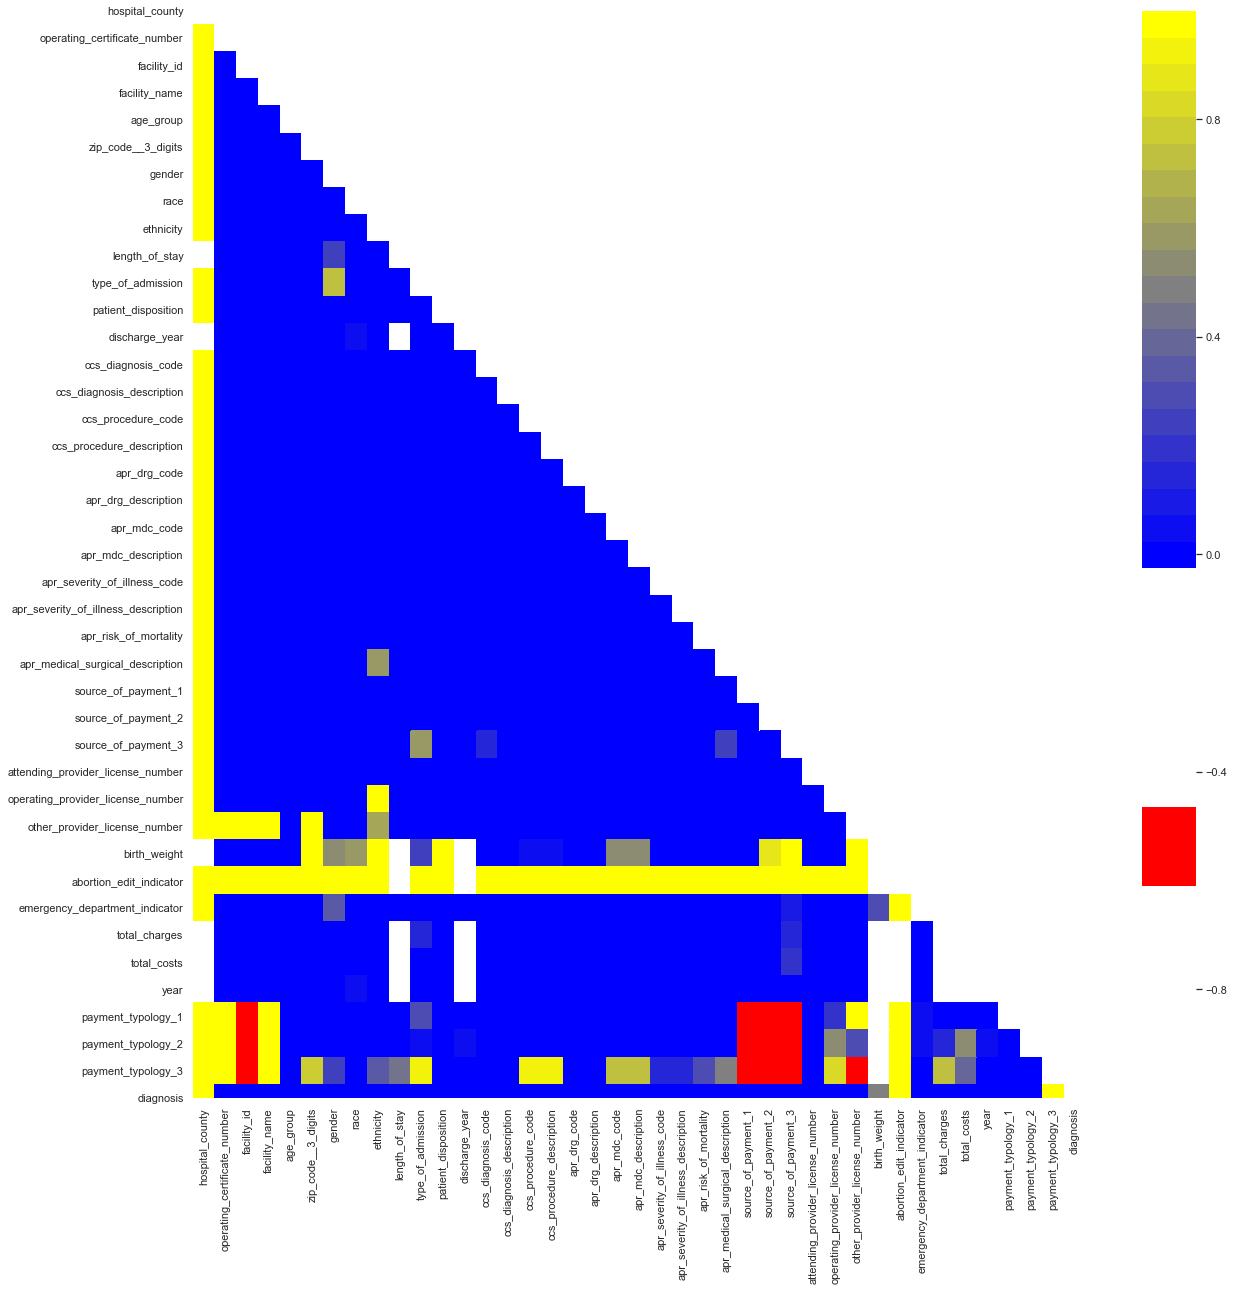

In [8]:
heatmap = sbrn.heatmap(heat_df_P, vmin=-1, vmax=1, cmap = colorPaletteReversed)

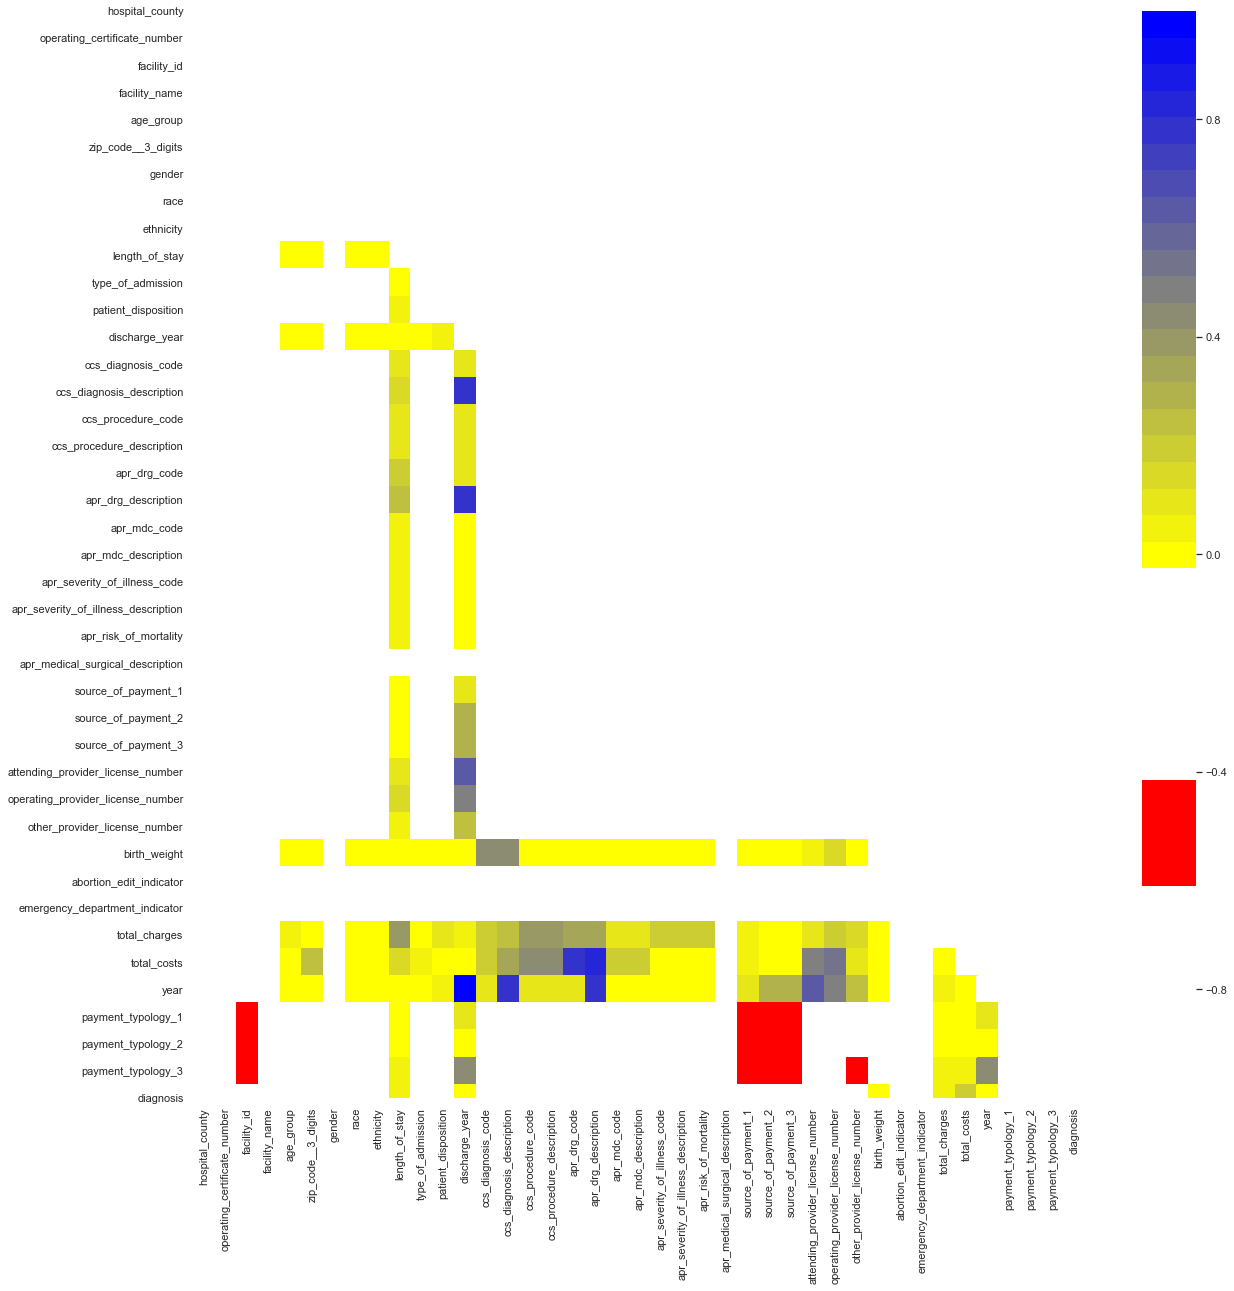

In [9]:
heatmap = sbrn.heatmap(heat_df_RSq, vmin=-1, vmax=1, cmap = colorPalette)